In [2]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler

columns_ = [i+2 for i in range(30)]
train = pd.read_excel('C:/Users/user/Desktop/Vigibase_dec_updated/tisa_ml/tisa_input_DPAexclude.xlsx', usecols= columns_)
label = train['label']
train.drop('label', axis=1, inplace=True)
#train.drop('Reported by pregnancy', axis=1, inplace=True)
#train.drop('Reported by different use pattern', axis=1, inplace=True)
print(f'train samples: {len(train)}, label samples: {len(label)}')
print(f'number of features: {len(train.columns)}')
count = label.value_counts()
print(count)
#print(227/879, (879-227)/879)
train

train samples: 443, label samples: 443
number of features: 23
1    373
0     70
Name: label, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_1352\2757810098.py:6: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  train = pd.read_excel('C:/Users/user/Desktop/Vigibase_dec_updated/tisa_ml/tisa_input_DPAexclude.xlsx', usecols= columns_)


,num_case,healthcare_pro,study_report,temp_pos,rechall_pos,dechall_pos,agg1,agg2,agg3,sex1,...,seriousness2,seriousness3,outcome1,outcome2,outcome3,vigi80,vigi50to80,pregnant_report,different_use,system_organ_class
0,6,6,2,0,0,0,0,0,0,2,...,1,0,0,0,0,0,0,0,1,7
1,11,11,4,0,0,0,0,0,0,5,...,5,0,1,1,0,0,0,0,2,7
2,19,19,8,1,0,0,0,0,0,11,...,11,0,9,2,0,0,1,0,4,7
3,10,10,5,0,0,0,0,0,0,5,...,2,0,5,0,1,0,0,0,0,14
4,16,16,12,1,0,0,0,0,0,10,...,1,0,3,1,8,0,1,0,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,187,187,21,44,0,8,0,0,0,80,...,113,4,83,5,14,33,8,0,7,17
439,16,16,7,2,0,0,0,0,0,10,...,10,1,1,1,3,2,0,0,0,11
440,6,6,0,2,0,0,0,0,0,6,...,5,1,0,0,0,0,2,0,1,13
441,3,3,2,2,0,0,0,0,0,1,...,0,0,1,0,2,1,1,0,0,11


In [3]:
# Stratified K Folds, train, val set ratio = 0.8: 0.2
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE # Import SMOTE function

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1004)
k_folded_data = list(skf.split(train, label)) # returns 5 tuples with index of (train_index, test_index)
print(f'Stratified Samples: {len(k_folded_data)}')

Stratified Samples: 4


In [4]:
# Stratified K Folds, train, val set ratio = 0.8: 0.2
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE # Import SMOTE function

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1004)
k_folded_data = list(skf.split(train, label)) # returns 5 tuples with index of (train_index, test_index)
print(f'Stratified Samples: {len(k_folded_data)}')

def data_split(train, train_index, test_index, selected_features = []):
    selected_features = np.array(selected_features)
    if len(selected_features):
        train_x, val_x = train.iloc[train_index].iloc[:, selected_features], train.iloc[test_index].iloc[:, selected_features]
        train_y, val_y = label.iloc[train_index], label.iloc[test_index]
    else:
        train_x, val_x = train.iloc[train_index], train.iloc[test_index]
        train_y, val_y = label.iloc[train_index], label.iloc[test_index]
    return train_x.reset_index(drop=True), train_y.reset_index(drop=True), val_x.reset_index(drop=True), val_y.reset_index(drop=True)

# data_split test
train_index = k_folded_data[0][0]
test_index = k_folded_data[0][1]

train_x, train_y, val_x, val_y  = data_split(train, train_index, test_index)

#모델설정
sm = SMOTE(random_state=0)

# train데이터를 넣어 복제함
x_resampled, y_resampled = sm.fit_resample(train_x, train_y)

print(f'Train samples: {len(train_x)} ({(round(len(train_x)/len(train),2)*100)}%)')
print(f'Valid samples: {len(val_x)} ({(round(len(val_x)/len(train),2)*100)}%)')
print(f'Number of features: {len(train_x.columns)}')
train_x.head()

Stratified Samples: 4
Train samples: 332 (75.0%)
Valid samples: 111 (25.0%)
Number of features: 23


,num_case,healthcare_pro,study_report,temp_pos,rechall_pos,dechall_pos,agg1,agg2,agg3,sex1,...,seriousness2,seriousness3,outcome1,outcome2,outcome3,vigi80,vigi50to80,pregnant_report,different_use,system_organ_class
0,6,6,2,0,0,0,0,0,0,2,...,1,0,0,0,0,0,0,0,1,7
1,11,11,4,0,0,0,0,0,0,5,...,5,0,1,1,0,0,0,0,2,7
2,19,19,8,1,0,0,0,0,0,11,...,11,0,9,2,0,0,1,0,4,7
3,10,10,5,0,0,0,0,0,0,5,...,2,0,5,0,1,0,0,0,0,14
4,16,16,12,1,0,0,0,0,0,10,...,1,0,3,1,8,0,1,0,1,22


In [5]:
from sklearn.metrics import roc_auc_score, roc_curve # Import function for estimating performance
from sklearn.model_selection import GridSearchCV, StratifiedKFold # Import function for cross-validation and hyperparameter tuning
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc 
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [6]:
import xgboost as xgb
from xgboost import XGBClassifier #Import gradient boosting machine

#Training gradient boosting machine algorithm by using training set
xgb1 = XGBClassifier()

xgb_params_grid = {
         'n_estimators':[1000], 'eta':[0.15],
         'max_depth':[10], 'min_child_weight':[4], 'gamma':[1], 
         'colsample_bytree':[0.8], 
         'random_state':[111]
        }

skf_infli = StratifiedKFold(n_splits=5, shuffle=True, random_state=1004) #10-fold cross validation

xgb1 = GridSearchCV(xgb1, param_grid=xgb_params_grid, scoring="roc_auc", cv=skf_infli, n_jobs = -1, verbose = -1)
xgb1 = xgb1.fit(x_resampled, y_resampled)

print("Best performance : {0:.4f}".format(xgb1.best_score_))
print("Best parameters: ", xgb1.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:21:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best performance : 0.9383
Best parameters:  {'colsample_bytree': 0.8, 'eta': 0.15, 'gamma': 1, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 1000, 'random_state': 111}


검증데이터셋에서 AUROC: 0.7416
검증데이터셋에서 AUPRC: 0.9475
검증데이터셋에서 ACCURACY: 0.7568


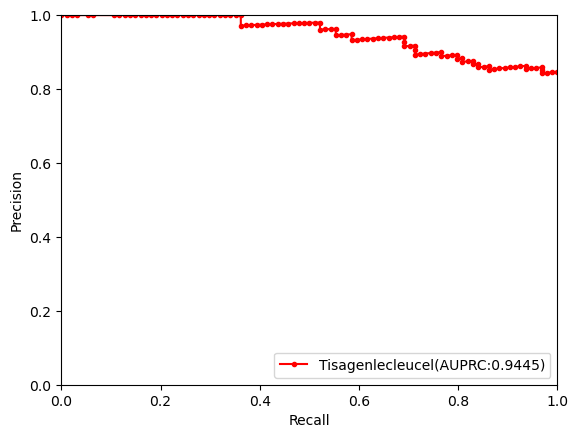

In [7]:
def plot_prc_curve_data(recall,precision,label=None):
    plt.plot(recall, precision, marker='.', color='red', label=label)
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower right")
    
xgb_roc_score = roc_auc_score(val_y, xgb1.predict_proba(val_x)[:,1], average='micro')

xgb_probs = xgb1.predict_proba(val_x)[:,1]
y_hat = xgb1.predict(val_x)
xgb_precision, xgb_recall, _ = precision_recall_curve(val_y,xgb_probs)
xgb_f1, xgb_auprc, xgb_accuracy = f1_score(val_y,y_hat), auc(xgb_recall,xgb_precision), accuracy_score(val_y,y_hat)

print('검증데이터셋에서 AUROC: %.4f' % (xgb_roc_score)) 
print('검증데이터셋에서 AUPRC: %.4f' % (xgb_auprc))
print('검증데이터셋에서 ACCURACY: %.4f' % (xgb_accuracy))


plot_prc_curve_data(xgb_recall, xgb_precision,label='Tisagenlecleucel(AUPRC:0.9445)')
plt.legend(loc="lower right")
plt.savefig('AUPRC', dpi=300)
plt.show()

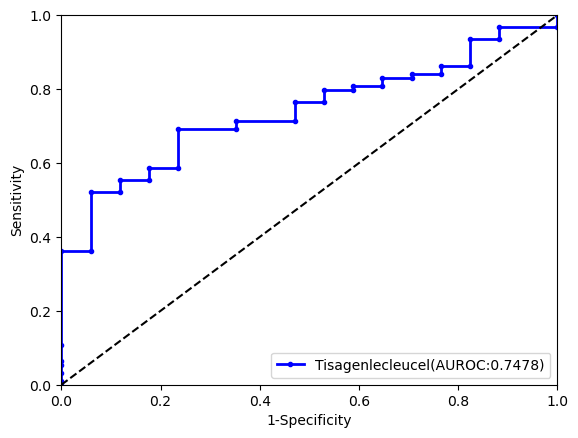

AUROC: 0.7416


In [8]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, color='blue', marker='.', label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.legend(loc="lower right")
    
y_probs_xgb = xgb1.predict_proba(val_x)
y_scores_xgb = y_probs_xgb[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(val_y, y_scores_xgb)

plot_roc_curve(fpr_xgb, tpr_xgb, label='Tisagenlecleucel(AUROC:0.7478)')
plt.legend(loc="lower right")
plt.savefig('AUROC', dpi=3000)

plt.show()

xgb_auroc = roc_auc_score(val_y, xgb1.predict_proba(val_x)[:,1], average='micro')
print('AUROC: %.4f' % (xgb_auroc))   

y_probs_xgb = xgb1.predict_proba(val_x)
validation = y_probs_xgb[:,1].reshape(-1,1)

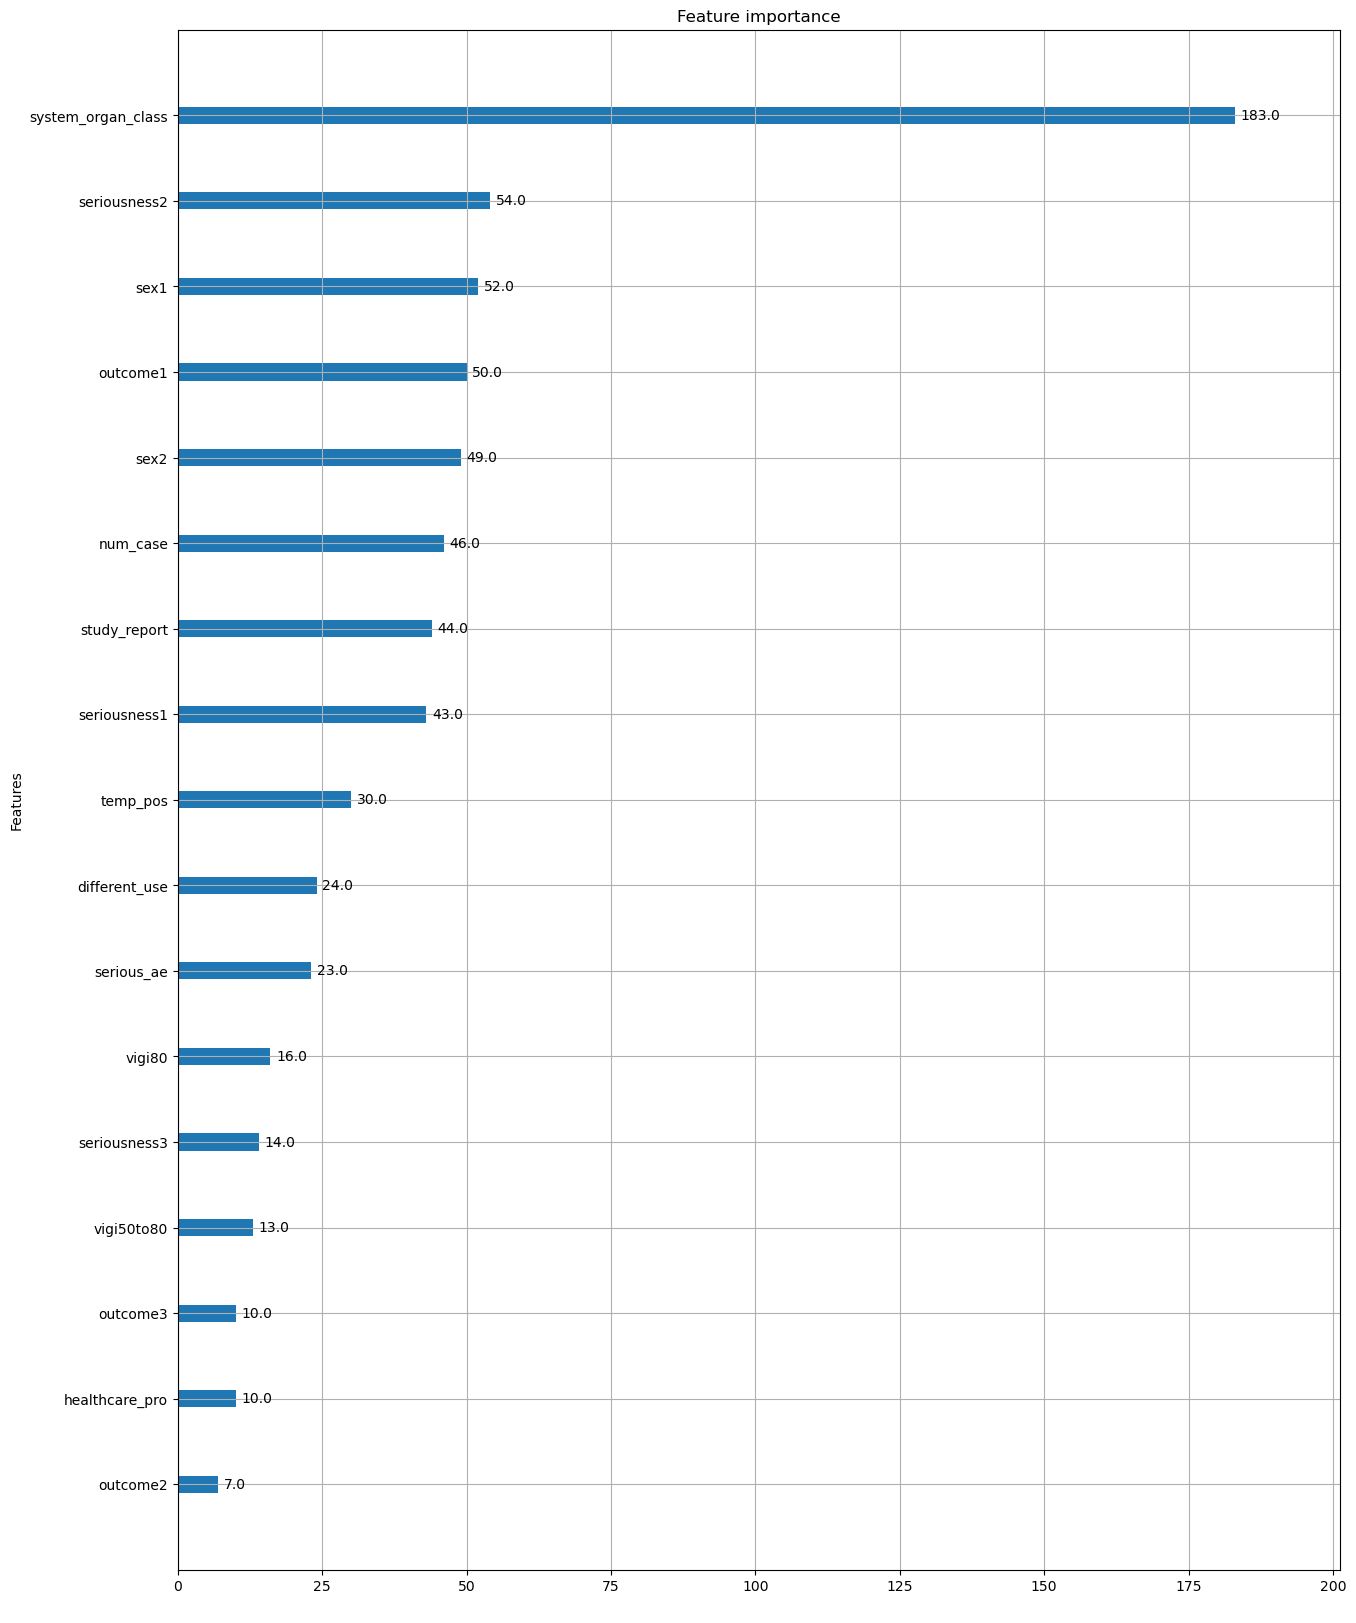

In [9]:
import xgboost

fig, ax = plt.subplots(figsize=(15,20))
xgboost.plot_importance(xgb1.best_estimator_, xlabel = ' ', title = 'Feature importance', ax=ax)
plt.savefig('feature importance', dpi=300)

In [81]:
columns_ = [i+3 for i in range(30)]
predict = pd.read_excel('C:/Users/user/Desktop/Vigibase_dec_updated/tisa_ml/performance_test/per_test.xlsx', sheet_name = 'Sheet2', usecols= columns_)
predict

C:\Users\user\AppData\Local\Temp\ipykernel_22184\3933303820.py:2: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  predict = pd.read_excel('C:/Users/user/Desktop/Vigibase_dec_updated/tisa_ml/performance_test/per_test.xlsx', sheet_name = 'Sheet2', usecols= columns_)


,num_case,healthcare_pro,study_report,temp_pos,rechall_pos,dechall_pos,agg1,agg2,agg3,sex1,...,outcome3,vigi80,vigi50to80,pregnant_report,different_use,system_organ_class,ROR_LCL,PRR_LCL,IC_LCL,EBGM05
0,3,3,1,3,0,0,0,0,0,1,...,0,2,1,0,0,3,13.458250,13.460666,0.543841,12.333259
1,3,3,0,0,0,0,0,0,0,2,...,0,0,0,0,0,22,0.601582,0.602051,-1.337966,0.721460
2,9,9,5,1,0,0,0,0,0,4,...,0,1,0,0,1,22,7.875552,7.867794,1.976324,7.003184
3,3,3,2,0,0,0,0,0,0,3,...,0,0,0,0,0,16,1.235745,1.236311,-0.621716,1.284336
4,4,4,2,0,0,0,0,0,0,4,...,0,0,0,0,2,13,12.570130,12.570298,1.095203,11.640693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,3,3,0,0,0,0,0,0,0,1,...,0,0,0,0,1,17,11.454009,11.456125,0.512446,10.041524
66,12,12,2,0,0,0,0,0,0,4,...,3,0,0,0,0,12,0.915492,0.916288,-0.325259,0.994435
67,3,3,3,0,0,0,0,0,0,1,...,0,0,0,0,1,13,12.676985,12.679285,0.532706,11.441119
68,3,3,1,0,0,0,0,0,0,3,...,0,0,0,0,0,1,25.283662,25.287823,0.631275,24.721987


In [82]:
preds = xgb1.predict_proba(predict)
preds_df = pd.DataFrame(preds)
preds_df

,0,1
0,0.851084,0.148916
1,0.900284,0.099716
2,0.406522,0.593478
3,0.867446,0.132554
4,0.825340,0.174660
...,...,...
65,0.917948,0.082052
66,0.053329,0.946671
67,0.859558,0.140442
68,0.970092,0.029908


In [83]:
preds_df.to_excel('C:/Users/user/Desktop/Vigibase_dec_updated/tisa_ml/performance_test/negative_signal.xlsx')

In [4]:
import sys

In [5]:
print("--sys.version—“)
print(sys.version)

SyntaxError: EOL while scanning string literal (3913437897.py, line 1)